In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# %cd /content/drive/MyDrive/FDM_Mini_Project

/content/drive/MyDrive/FDM_Mini_Project


In [29]:
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt # data visualization
import seaborn as sn # statistical data visualization
sn.set()
from sklearn.model_selection import train_test_split
%matplotlib inline

In [30]:
dataset = pd.read_csv('Training Data.csv')
dataset.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [31]:
dataset.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [32]:
dataset['Married/Single'].describe()

count     252000
unique         2
top       single
freq      226272
Name: Married/Single, dtype: object

In [33]:
dataset['House_Ownership'].describe()

count     252000
unique         3
top       rented
freq      231898
Name: House_Ownership, dtype: object

In [34]:
dataset['Car_Ownership'].describe()

count     252000
unique         2
top           no
freq      176000
Name: Car_Ownership, dtype: object

In [35]:
dataset['Profession'].describe()

count        252000
unique           51
top       Physician
freq           5957
Name: Profession, dtype: object

In [36]:
dataset['STATE'].describe()

count            252000
unique               29
top       Uttar_Pradesh
freq              28400
Name: STATE, dtype: object

In [37]:
dataset['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [38]:
dataset['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [39]:
dataset['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [40]:
dataset['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [41]:
dataset['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [42]:
new_dataset = dataset.rename({'Married/Single': 'Marital_Status'}, axis=1)
new_dataset.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [43]:
new_dataset1 = new_dataset.drop(["Id","CITY"],axis = 1)
new_dataset1.head()

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tamil_Nadu,3,14,1


In [44]:
#Encode
def feature_engineering(df):
  Marital_Status_encode = {'single':0, 'married':1}
  new_dataset1.Marital_Status = new_dataset1.Marital_Status.map(Marital_Status_encode)

  House_Ownership_encode = {'rented':1, 'norent_noown':2, 'owned':3}
  new_dataset1.House_Ownership = new_dataset1.House_Ownership.map(House_Ownership_encode)

  Car_Ownership_encode = {'no':0, 'yes':1}
  new_dataset1.Car_Ownership = new_dataset1.Car_Ownership.map(Car_Ownership_encode)

  Profession_encode = {'Mechanical_engineer':1, 'Software_Developer':2, 'Technical_writer':3,'Civil_servant':4, 'Librarian':5, 'Economist':6, 'Flight_attendant':7,
                      'Architect':8, 'Designer':9, 'Physician':10, 'Financial_Analyst':11,'Air_traffic_controller':12, 'Politician':13, 'Police_officer':14, 'Artist':15,
                      'Surveyor':16, 'Design_Engineer':17, 'Chemical_engineer':18,'Hotel_Manager':19, 'Dentist':20, 'Comedian':21, 'Biomedical_Engineer':22,
                      'Graphic_Designer':23, 'Computer_hardware_engineer':24,'Petroleum_Engineer':25, 'Secretary':26, 'Computer_operator':27,
                      'Chartered_Accountant':28, 'Technician':29, 'Microbiologist':30,'Fashion_Designer':31, 'Aviator':32, 'Psychologist':33, 'Magistrate':34,
                      'Lawyer':35, 'Firefighter':36, 'Engineer':37, 'Official':38, 'Analyst':39,'Geologist':40, 'Drafter':41, 'Statistician':42, 'Web_designer':43,
                      'Consultant':44, 'Chef':45, 'Army_officer':46, 'Surgeon':47, 'Scientist':48,'Civil_engineer':49, 'Industrial_Engineer':50, 'Technology_specialist':51}
  new_dataset1.Profession = new_dataset1.Profession.map(Profession_encode)

  State_encode = {'Madhya_Pradesh':1, 'Maharashtra':2, 'Kerala':3, 'Odisha':4, 'Tamil_Nadu':5,'Gujarat':6, 'Rajasthan':7, 'Telangana':8, 'Bihar':9, 'Andhra_Pradesh':10,
                  'West_Bengal':11, 'Haryana':12, 'Puducherry':13, 'Karnataka':14,'Uttar_Pradesh':15, 'Himachal_Pradesh':16, 'Punjab':17, 'Tripura':18,
                  'Uttarakhand':19, 'Jharkhand':20, 'Mizoram':21, 'Assam':22,'Jammu_and_Kashmir':23, 'Delhi':24, 'Chhattisgarh':25, 'Chandigarh':26,
                  'Uttar_Pradesh[5]':27, 'Manipur':28, 'Sikkim':29}
  new_dataset1.STATE = new_dataset1.STATE.map(State_encode)

  return new_dataset1

In [45]:
new_dataset2 = feature_engineering(new_dataset1)
new_dataset2.head()

,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,1,0,1,1,3,13,0
1,7574516,40,10,0,1,0,2,2,9,13,0
2,3991815,66,4,1,1,0,3,3,4,10,0
3,6256451,41,2,0,1,1,2,4,2,12,1
4,5768871,47,11,0,1,0,4,5,3,14,1


In [46]:
#Dataset without labels
X = new_dataset2.drop(['Risk_Flag'], axis=1)

#Labels
y = new_dataset2['Risk_Flag']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state = 42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176400, 10), (75600, 10), (176400,), (75600,))

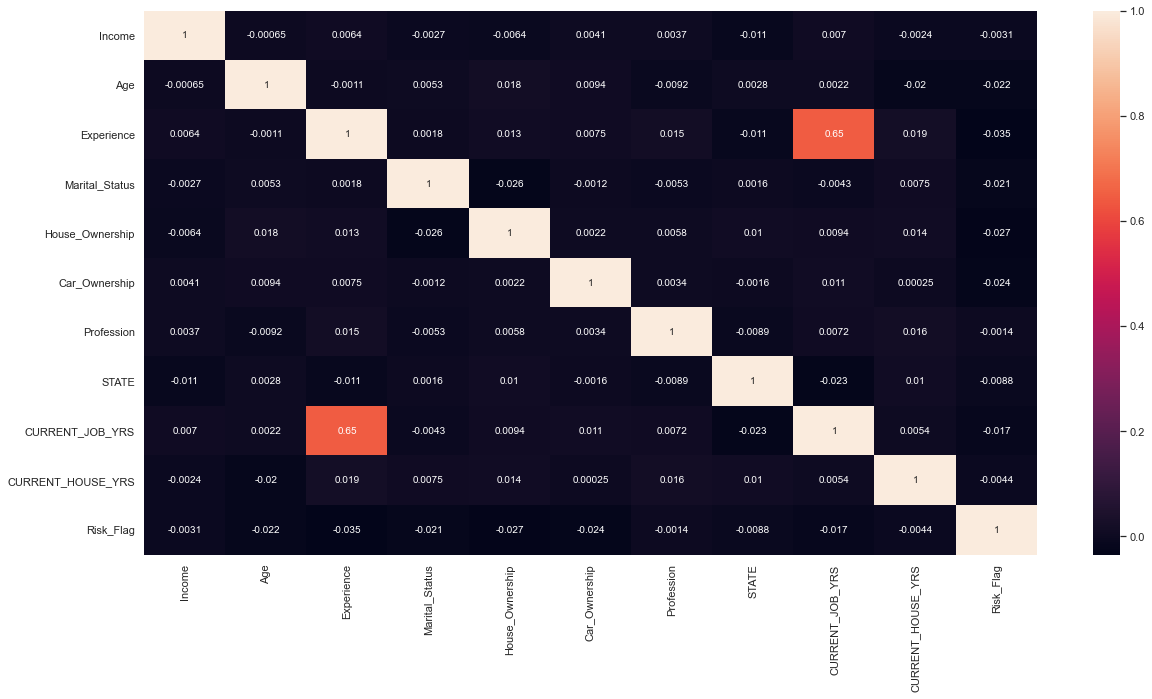

In [48]:
plt.figure(figsize = (20,10))
corrMatrix=new_dataset2.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

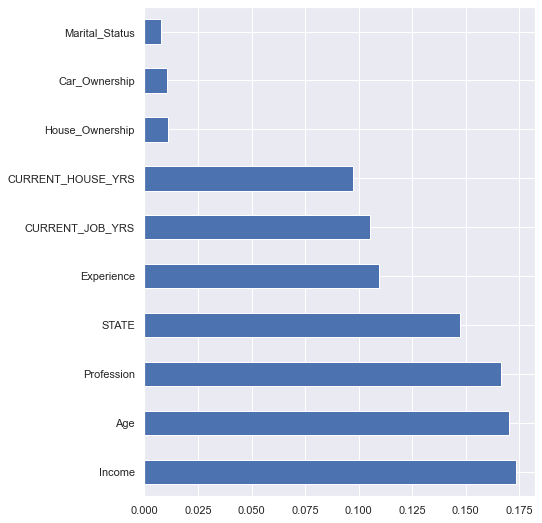

In [49]:
#Feature importances
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize = (7,9))
imp = pd.Series(model.feature_importances_,index= X.columns)
imp.nlargest(30).plot(kind='barh')

plt.show()

<AxesSubplot:>

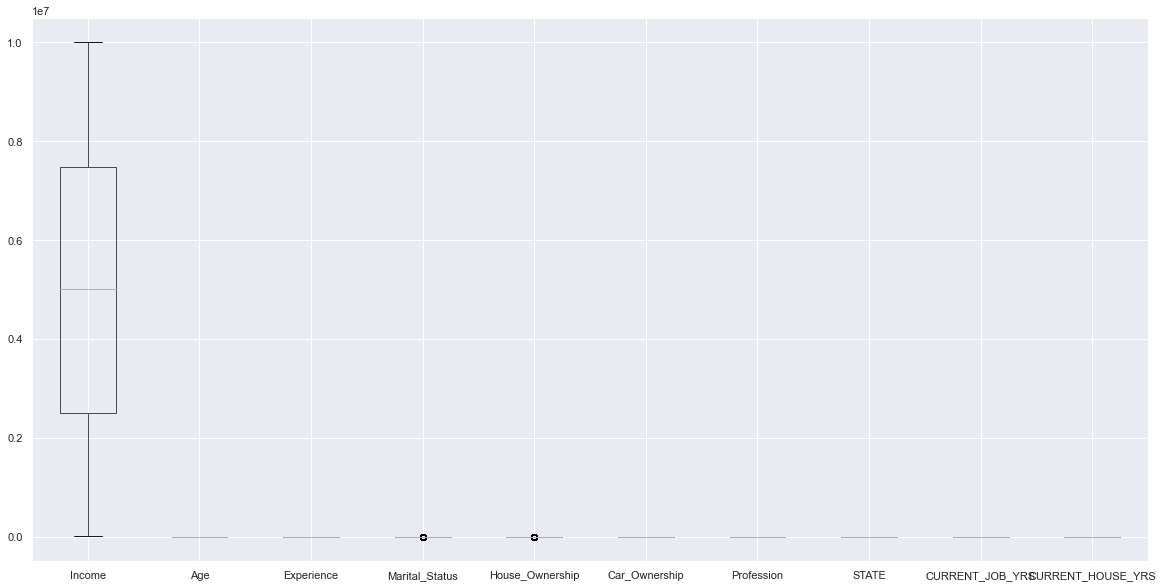

In [50]:
X.boxplot(figsize=(20,10))

# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

gini = DecisionTreeClassifier(criterion = "entropy",
            random_state = 880,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)

y_pred = gini.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.8775

The AUC-ROC score is 0.50086407018391


# Random Forest

In [52]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=42)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.8990476190476191

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.60      0.54      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600


The AUC-ROC score is 0.7467347061632134


# Gradient Boost

In [53]:
#%%script false
# import classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# instantiate the classifier 
gb = GradientBoostingClassifier()

# fit the model
gb.fit(X_train, y_train)

# Predict the Test set results
y_pred = gb.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.8776984126984126

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.73      0.00      0.01      9271

    accuracy                           0.88     75600
   macro avg       0.80      0.50      0.47     75600
weighted avg       0.86      0.88      0.82     75600


The AUC-ROC score is 0.502044191875209


# KNN

In [54]:
#%%script false
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# instantiate the classifier 
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

# Predict the Test set results
y_pred = knn.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.8880555555555556

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     66329
           1       0.55      0.48      0.51      9271

    accuracy                           0.89     75600
   macro avg       0.74      0.71      0.73     75600
weighted avg       0.88      0.89      0.88     75600


The AUC-ROC score is 0.7143509746025521


In [55]:
import pickle

pickle.dump(gini,open('Decision_Tree.pkl','wb'))
pickle.dump(rfc,open('Random_Forest.pkl','wb'))
pickle.dump(gb,open('Gradient_Boost.pkl','wb'))
pickle.dump(knn,open('KNN.pkl','wb'))